In [67]:
import pandas
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

#from sklearn.preprocessing import StandardScaler

In [68]:
#read csv file
df = pandas.read_csv('data/iris_4D.csv', header=None)
#table dimensions
col_count = df.shape[1]
#add column names
for i in range(col_count-1):
    df.rename(columns={i: 'X'+str(i)}, inplace=True)
df.rename(columns={col_count-1: 'Class'}, inplace=True)

#label encoder for class column if its more than 3 columns

#le = LabelEncoder()
#df['Class_Enc'] = le.fit_transform(df['Class'])

#Get the first 2 columns
#df_2d = df[['X0', 'X1']]
#scaler= StandardScaler()

#caler.fit(df_2d)

#data = scaler.transform(df_2d)

#Remplace the first 2 columns with the scaled data
#df = df.drop(['X0', 'X1'], axis=1)
#df['X0'] = data[:, 0]
#df['X1'] = data[:, 1]

#move the class column to the end
#df = df[['X0', 'X1', 'Class', 'Class_Enc']]

#df = df.drop(['Class_Enc'], axis=1)
#save_path = 'data/creditos_scaled.csv'
#df.to_csv(save_path, index=False)
df

,X0,X1,X2,X3,Class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [69]:
#plot data using last column as color group
if col_count == 3:
    sns.scatterplot(x='X0', y='X1', hue='Class', data=df)
elif col_count == 4:
    #plot scatterplot in 3d
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(df['X0'], df['X1'], df['X2'], c=df['Class_Enc'], marker='o')
    ax.set_xlabel('X0')
    ax.set_ylabel('X1')
    ax.set_zlabel('X2')
    plt.show()
else:
    print('Cannot plot data with more than 3 dimensions')
    

    

Cannot plot data with more than 3 dimensions


C:\Users\juanj\AppData\Local\Temp\ipykernel_28516\3678044249.py:17: UserWarning: The palette list has more values (2) than needed (1), which may not be intended.
  sns.scatterplot(x='X0', y='X1', hue='Class', data=test, palette=['black', 'red'])


<Axes: xlabel='X0', ylabel='X1'>

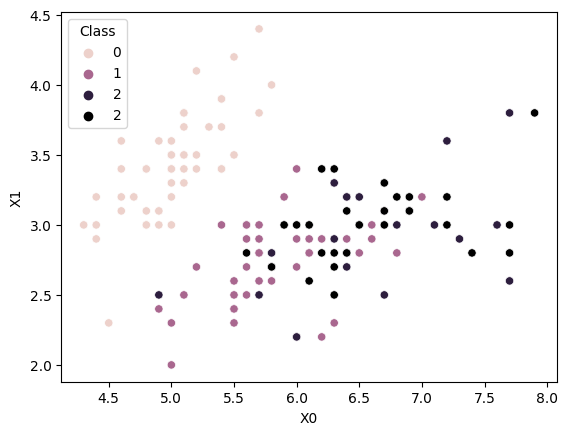

In [70]:
#Take 80% for training and 20% for testing
#train = df.sample(frac=0.8, random_state=200)
#test = df.drop(train.index)
#Separate data into train and test
train = df.loc[:int(df.shape[0]*0.8)-1, :].copy()
# tomar el 20% de los datos para prueba sin aleatoriedad
test = df.loc[int(df.shape[0]*0.8):, :].copy()
# actualizar los valores del DataFrame original usando .loc[]
train.loc[:, :] = df.loc[:int(df.shape[0]*0.8), :]
test.loc[:, :] = df.loc[int(df.shape[0]*0.8):, :]

#plot training data

sns.scatterplot(x='X0', y='X1', hue='Class', data=train)

#plot testing data with different color
sns.scatterplot(x='X0', y='X1', hue='Class', data=test, palette=['black', 'red'])





In [71]:
train
#save to csv
save_path = 'data/train.csv'
train.to_csv(save_path, index=False)

In [72]:
#test
test

test.to_csv('data/test.csv', index=False)

In [73]:
# n dimensional eclidian distance
def distance(x, y):
    return sum([(x[i]-y[i])**2 for i in range(len(x))])**0.5


In [74]:
# distance between n dimensional points
testa = [1.5, 1.5]  
# calculate distance between test point and all points in dataframe
#df['Distance'] = df.apply(lambda row: distance(row[:-2], testa), axis=1)

In [75]:
# sort by distance
#df.sort_values(by=['Distance'])

In [76]:
# get k nearest neighbors
def knn(df_test, df_train, k):
    #for each row in test dataframe
    for index, row in df_test.iterrows():
        #calculate distance between test point and all points in dataframe
        print('Test point: ', row[:-1])
        print("---------------------------")
        df_train['Distance'] = df_train.apply(lambda rowT: distance(rowT[:-1], row[:-1]), axis=1)
        df_train.sort_values(by=['Distance'], inplace=True)
        #sort by distance
        print('Train points: ')
        print(df_train)
        
        #save to csv
        #get k nearest neighbors
        neighbors = df_train.head(k)


        #print('Neighbors: ')
        #print(neighbors)
        #get most common class
        print('-----------------------\n Class: ')
        print(neighbors['Class'].value_counts())
        classi = neighbors['Class'].value_counts().idxmax()
        print(classi)

       
        #add class_pred column to test dataframe
        df_test.loc[index, 'Class_pred'] = str(classi)

        #drop distance column
        df_train.drop(columns=['Distance'], inplace=True)

       # input("Press Enter to continue...")
        
    return df_test


prueba = pandas.DataFrame([[5, 4, 0]], columns=['X0', 'X1', 'Class'])
x_test=knn(test,train, 20)
    


Test point:  X0    6.9
X1    3.2
X2    5.7
X3    2.3
Name: 120, dtype: float64
---------------------------
Train points: 
      X0   X1   X2   X3  Class  Distance
112  6.8  3.0  5.5  2.1      2  0.360555
102  7.1  3.0  5.9  2.1      2  0.400000
104  6.5  3.0  5.8  2.2      2  0.469042
115  6.4  3.2  5.3  2.3      2  0.640312
109  7.2  3.6  6.1  2.5      2  0.670820
..   ...  ...  ...  ...    ...       ...
41   4.5  2.3  1.3  0.3      0  5.470832
42   4.4  3.2  1.3  0.2      0  5.479051
38   4.4  3.0  1.3  0.2      0  5.482700
22   4.6  3.6  1.0  0.2      0  5.652433
13   4.3  3.0  1.1  0.1      0  5.727128

[120 rows x 6 columns]
-----------------------
 Class: 
Class
2    14
1     6
Name: count, dtype: int64
2
Test point:  X0    5.6
X1    2.8
X2    4.9
X3    2.0
Name: 121, dtype: float64
---------------------------
Train points: 
      X0   X1   X2   X3  Class  Distance
101  5.8  2.7  5.1  1.9      2  0.316228
113  5.7  2.5  5.0  2.0      2  0.331662
114  5.8  2.8  5.1  2.4      2  0.

In [77]:
x_test

,X0,X1,X2,X3,Class,Class_pred
120,6.9,3.2,5.7,2.3,2,2
121,5.6,2.8,4.9,2.0,2,1
122,7.7,2.8,6.7,2.0,2,2
123,6.3,2.7,4.9,1.8,2,1
124,6.7,3.3,5.7,2.1,2,2
125,7.2,3.2,6.0,1.8,2,2
126,6.2,2.8,4.8,1.8,2,1
127,6.1,3.0,4.9,1.8,2,1
128,6.4,2.8,5.6,2.1,2,2
129,7.2,3.0,5.8,1.6,2,2


In [78]:
#calculate accuracy
def accuracy(df):
    #set class_pred to string
    df['Class_pred'] = df['Class_pred'].astype(str)
    #set class to string
    df['Class'] = df['Class'].astype(str)
    print(f"Accuracy: {sum(df['Class'] == df['Class_pred'])}/{len(df)}")
    return sum(df['Class'] == df['Class_pred'])/len(df)
